In [1]:
# import the necessary libraries:
import pandas as pd
import cv2

# Python libraries for visualisation :
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = "plotly_white"

# Python libraries for The model :
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


C:\Users\Fatine Boussattine\AppData\Local\Temp\ipykernel_18708\3288295030.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In this forecasting project, we will extensively explore the Plotly library, which is a visualization tool for creating interactive plots in Python.

In [3]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import cv2

**Load the Time Series Dataset**

You can access the data and download it via the link : https://statso.io/forecasting-subscriptions-case-study/

In [2]:
df = pd.read_csv('Netflix-Subscriptions.csv')
df

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000
5,01/07/2014,47990000
6,01/10/2014,50650000
7,01/01/2015,54480000
8,01/04/2015,59620000
9,01/07/2015,62080000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Time Period            42 non-null     datetime64[ns]
 1   Subscribers            42 non-null     int64         
 2   Year                   42 non-null     int32         
 3   Quarterly Growth Rate  41 non-null     float64       
 4   Bar Color              42 non-null     object        
 5   Month                  42 non-null     int32         
 6   Quarter                42 non-null     int32         
 7   Day                    42 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(1)
memory usage: 2.1+ KB


It is recommended to convert the 'Time Period' object into a datetime variable

In [4]:
df['Time Period'] = pd.to_datetime(df['Time Period'], format='%d/%m/%Y')
df.head()

,Time Period,Subscribers
0,2013-04-01,34240000
1,2013-07-01,35640000
2,2013-10-01,38010000
3,2014-01-01,41430000
4,2014-04-01,46130000


This Time Series Dataset contains subscription counts of Netflix at the start of each quarter from 2013 to 2023.

**Visualisations**

In [5]:
fig = px.line(df, x="Time Period", y="Subscribers", title='Netflix Subscriptions over time')
fig.show()

**UPDATE :** Here I make sure you see the output of the code above, since I just noticed the uploaded jupyter file doesn't display images generated with plotly package - **NO NEED TO RUN THE SCRIPT BELOW ON YOUR OWN MACHINE !!**

In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


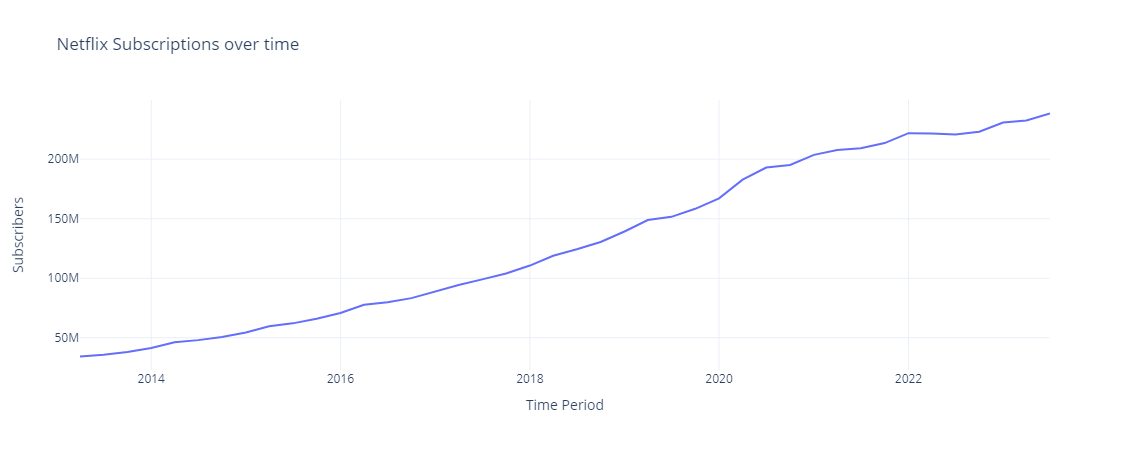

In [3]:
import IPython.display as display
from PIL import Image

display.display(Image.open("Netflix Subscriptions over time.png"))

From this plot, we can see there is a **trend**. But there is **NO seasonality**

<Axes: title={'center': 'Netflix Subscriptions'}, ylabel='Frequency'>

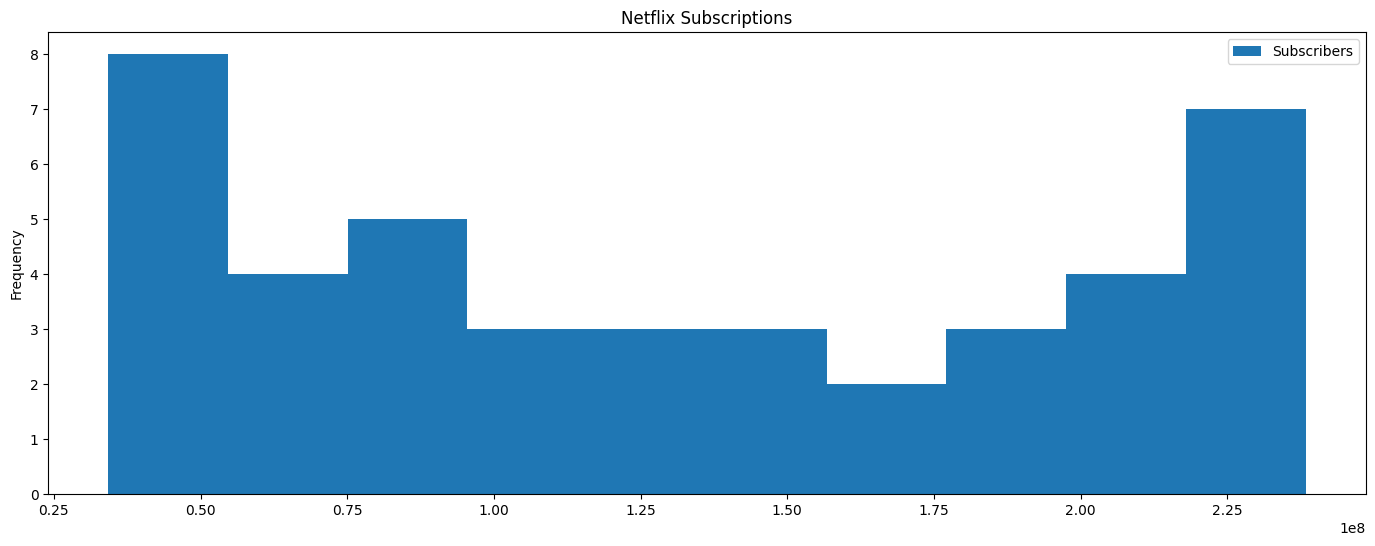

In [6]:
df.plot.hist(title='Netflix Subscriptions', figsize=(17, 6))

Based on the graph, it appears that the distribution is not Gaussian. This observation suggests that the data may not be stationary. 

To confirm the stationarity of the time series, we will split the data by years and calculate the mean for each year. If the mean remains relatively constant across the years, the time series is considered stationary. However, if there are significant variations in the mean values, then the time series is likely non-stationary.

In [7]:

df['Year'] = df['Time Period'].dt.year
df.groupby('Year')['Subscribers'].mean()


Year
2013    3.596333e+07
2014    4.655000e+07
2015    6.055000e+07
2016    7.793250e+07
2017    9.662750e+07
2018    1.210775e+08
2019    1.495025e+08
2020    1.845125e+08
2021    2.085100e+08
2022    2.218100e+08
2023    2.338800e+08
Name: Subscribers, dtype: float64

The mean doesn't remain stable. So, the data isn't stationary.

In [8]:
df['Quarterly Growth Rate'] = df['Subscribers'].pct_change() * 100


# Create a new column for bar color (green for positive growth, red for negative growth)
df['Bar Color'] = df['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')

# Plot the quarterly growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Time Period'],
    y=df['Quarterly Growth Rate'],
    marker_color=df['Bar Color'],
    name='Quarterly Growth Rate'
))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth Rate',
                  xaxis_title='Time Period',
                  yaxis_title='Quarterly Growth Rate (%)')
fig.show()

**UPDATE :** Here I make sure you see the output of the code above, since I just noticed the uploaded jupyter file doesn't display images generated with plotly package - **NO NEED TO RUN THE SCRIPT BELOW ON YOUR OWN MACHINE !!**

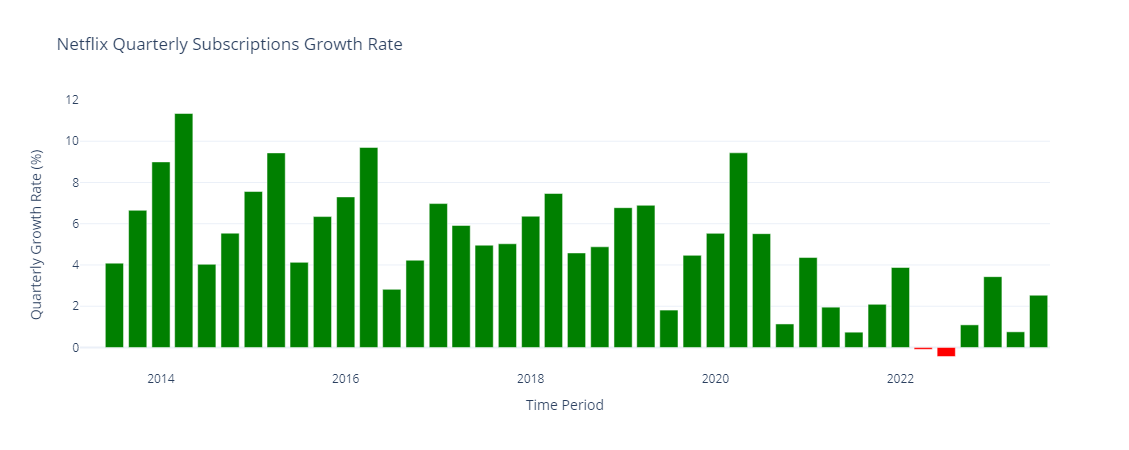

In [4]:

display.display(Image.open("Netflix Quarterly Subscriptions Growth Rate.png"))

Changes over years :

In [9]:
# Calculate the yearly growth rate
df['Year'] = df['Time Period'].dt.year
yearly_growth = df.groupby('Year')['Subscribers'].pct_change().fillna(0) * 100

# Create a new column for bar color (green for positive growth, red for negative growth)
df['Bar Color'] = yearly_growth.apply(lambda x: 'green' if x > 0 else 'red')

# Plot the yearly subscriber growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Year'],
    y=yearly_growth,
    marker_color=df['Bar Color'],
    name='Yearly Growth Rate'
))
fig.update_layout(title='Netflix Yearly Subscriber Growth Rate',
                  xaxis_title='Year',
                  yaxis_title='Yearly Growth Rate (%)')
fig.show()

**UPDATE :** Here I make sure you see the output of the code above, since I just noticed the uploaded jupyter file doesn't display images generated with plotly package - **NO NEED TO RUN THE SCRIPT BELOW ON YOUR OWN MACHINE !!**

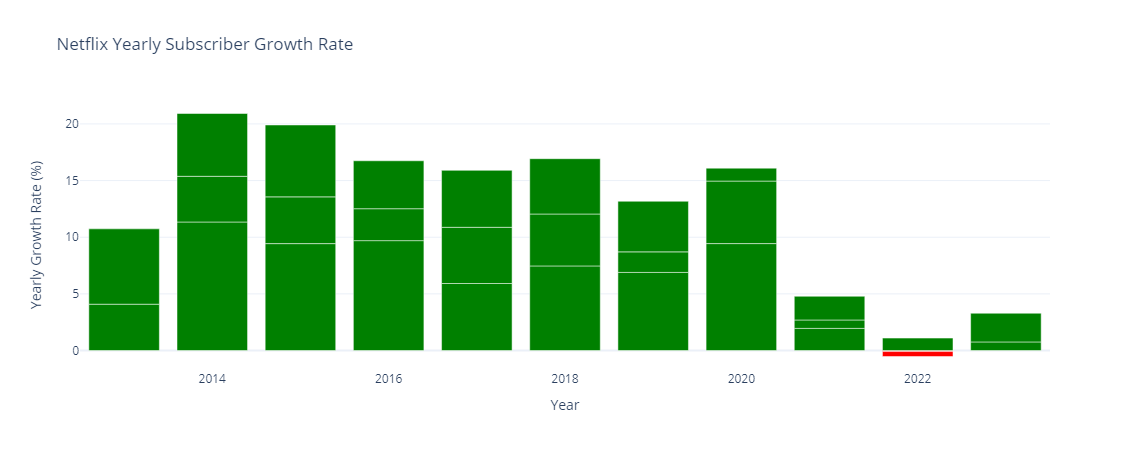

In [5]:

display.display(Image.open("Netflix Yearly Subscriber Growth Rate.png"))

**UPDATE !!** One advantage of using Plotly package is that you can zoom in on your graph and view every numeric data in real-time by hovering over a bar (or line depending on which chart you are working on). 

You can also box-select a specific part of your chart to display relevant information, as shown in the example below, which illustrates the growth rate in 2022 :

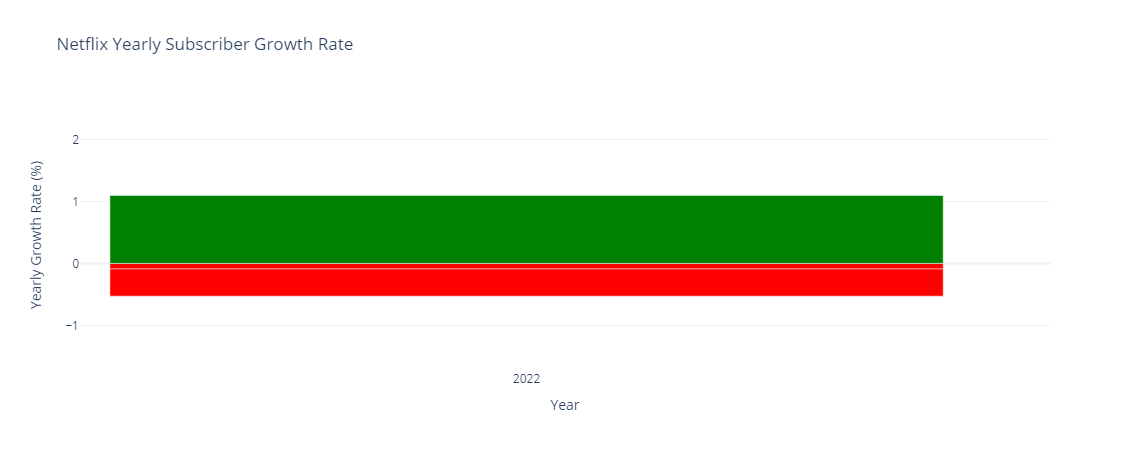

In [6]:
display.display(Image.open("Netflix Subscriber Growth Rate year 2022.png"))

In [27]:
# Create new features
# Remind that we only want to boxplot quarters and years, because in the TS dataset months aren't all described, besides 'days' that are only the first of each month.
df['Quarter'] = df['Time Period'].dt.quarter

# Boxplots for changes over years and quarters:
fig1 = px.box(df, x= 'Quarter', y='Subscribers')
fig1.update_layout(title='Netflix Subscribers Boxplot by Quarters')
fig1.show()
fig2 = px.box(df, x= 'Year', y='Subscribers')
fig2.update_layout(title='Netflix Subscribers Boxplot by Years')
fig2.show()

**UPDATE :** Here I make sure you see the output of the code above, since I just noticed the uploaded jupyter file doesn't display images generated with plotly package - **NO NEED TO RUN THE SCRIPT BELOW ON YOUR OWN MACHINE !!**

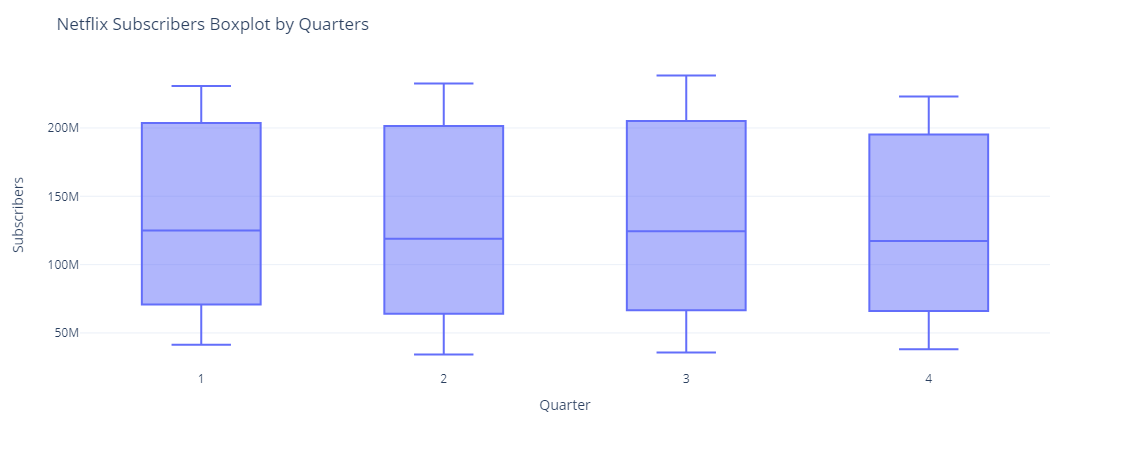

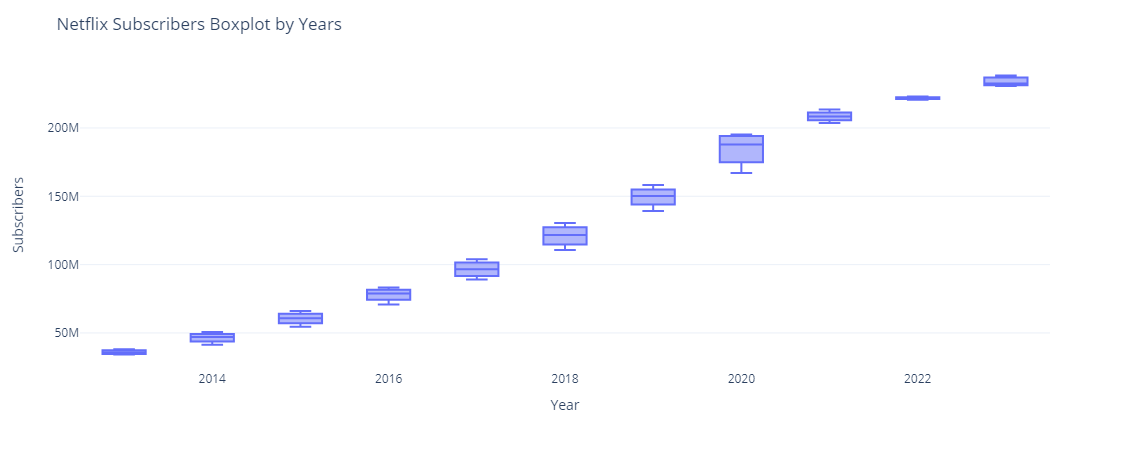

In [7]:
display.display(Image.open("Netflix Subscribers Boxplot by Quarters.png"))
display.display(Image.open("Netflix Subscribers Boxplot by Years.png"))

So, Netflix subscribers tend to peak over years

# Using ARIMA for Forecasting Netflix Quarterly Subscriptions :

I will start by converting the data into a time series format:

Here we are converting the original DataFrame into a time series format, where the Time Period column becomes the index, and the Subscribers column becomes the data.

In [48]:
# Create a new DataFrame with 'column_name' as the index
new_df = df.set_index('Time Period')
new_df = new_df[['Subscribers']].copy()
new_df.head()

,Subscribers
Time Period,
2013-04-01,34240000
2013-07-01,35640000
2013-10-01,38010000
2014-01-01,41430000
2014-04-01,46130000


Now let’s get started with Time Series Forecasting using ARIMA to forecast the number of subscriptions of Netflix using Python.

The ARIMA model has 3 parameters : 
- The order of differencing (d)
- The number of periods in the forecasting period (p) 
- The order of moving average (q)

We find about these parameters with the help of ACF and PACF plots of the differenced time series

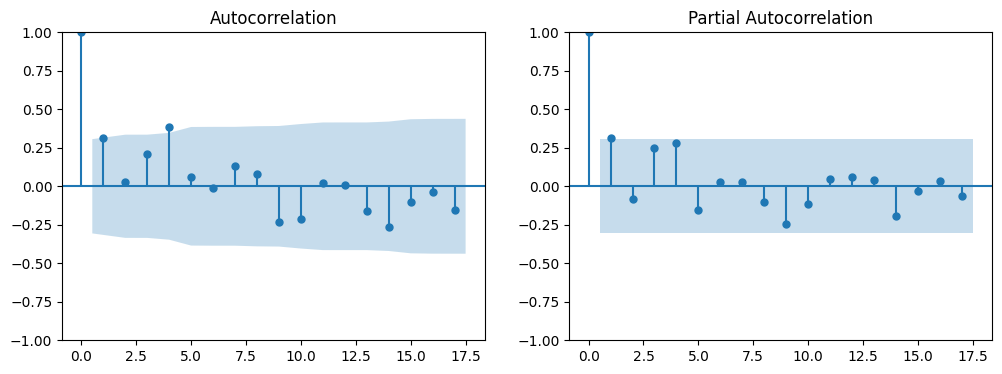

In [71]:
differenced_series = new_df.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

These plots are useful for determining the appropriate parameters when using the ARIMA model for time series forecasting.

So, with ACF plot, q = 1, while the PACF plot also cuts off at lag 1, indicating p=1

As there is a linear trend in the subscription growth rate, we can set the value of d as 1 to remove the linear trend, making the time series stationary.



In [72]:
# Let's use the ARIMA Model !
p, d, q = 1, 1, 1
model = ARIMA(new_df, order=(p, d, q))
arima_model = model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Fri, 09 Feb 2024   AIC                           1351.986
Time:                        21:54:01   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.769      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



Let's make predictions for the next 5 quarters !

In [19]:
new_df.tail()

,Subscribers
Time Period,
01/07/2022,220670000
01/10/2022,223090000
01/01/2023,230750000
01/04/2023,232500000
01/07/2023,238390000


In [88]:
len(new_df)

42

In [87]:
# Let's fix the issue with the future indexes :
future_steps = 5
predictions = arima_model.predict(len(new_df), len(new_df) + future_steps - 1)
predictions = predictions.astype(int)
predictions

2023-10-01    243321465
2024-01-01    248251663
2024-04-01    253180592
2024-07-01    258108254
2024-10-01    263034649
Freq: QS-OCT, Name: predicted_mean, dtype: int32

Now let’s visualize the results of Netflix Subscriptions Forecasting for the next five quarters:

In [82]:
# Create a DataFrame with the original data and predictions
time_series = df.set_index('Time Period')['Subscribers']
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='Netflix Quarterly Subscription Predictions',
                  xaxis_title='Time Period',
                  yaxis_title='Subscribers',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()


**UPDATE :** Here I make sure you see the output of the code above, since I just noticed the uploaded jupyter file doesn't display images generated with plotly package - **NO NEED TO RUN THE SCRIPT BELOW ON YOUR OWN MACHINE !!**

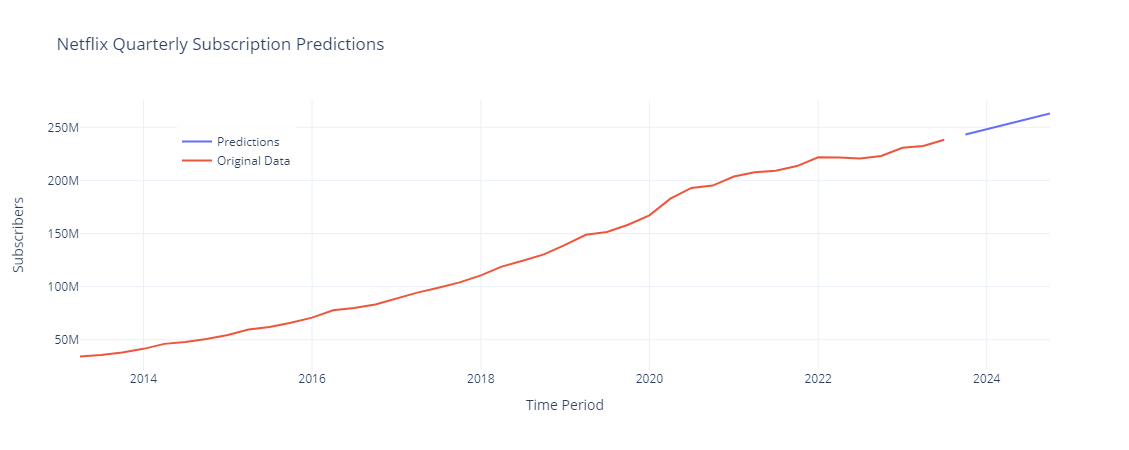

In [10]:
display.display(Image.open("Netflix Quarterly Subscription Predictions.png"))

In [83]:
len(new_df)

42

In [80]:
arima_model.predict(41, 46)

2023-07-01    2.374114e+08
2023-10-01    2.433215e+08
2024-01-01    2.482517e+08
2024-04-01    2.531806e+08
2024-07-01    2.581083e+08
2024-10-01    2.630346e+08
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [ ]:
'This is another method to make forecasting into the future : arima_model.get_forecast(steps=5).predicted_mean'
future_steps = 5

# Use the predict method
predictions = arima_model.get_forecast(steps=future_steps)

# Access the predicted values
predicted_values = predictions.predicted_mean.astype(int)